# Prosper Loan Data Analysis
### by Ayush
## Preliminary Wrangling

This document is to perform preliminary on a comprehensive loan dataset that includes loan accounts current and completed along with the credit history details

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
df = pd.read_csv('prosperLoanData.csv')
print(df.shape)
print(df.dtypes)
df.head(10)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
df['DebtToIncomeRatio'].max(),df['DebtToIncomeRatio'].min()

(10.01, 0.0)

In [7]:
#df['CreditScoreRangeLower'].value_counts()
df['LenderYield'].value_counts()
df['EstimatedReturn'].value_counts()
df['LoanOriginalAmount'].min()

1000

In [8]:
df['LoanStatus']= df['LoanStatus'].astype('category')
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
ordinal_var = { 'CreditScoreRangeUpper': np.arange(19.0,900.0),
                'CreditScoreRangeLower': np.arange(0.0,881.0),
                'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
                'ProsperScore': [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0],
                'ProsperRating (numeric)':[1.0,2.0,3.0,4.0,5.0,6.0,7.0]
                }

for var in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var[var])
    df[var] = df[var].astype(ordered_var)

### What is the structure of your dataset?

> There are 113937 entries with 81 features in the dataset.This is a huge dataset in terms of scale and will be a challenge to analyze. Most variables in the dataset are numeric and floats as they deal with loan amounts, principal, interest and other loan related amounts including calculation of profit loss for Prosper and other metrics to keep track of the loan payments. The variables below are categorical and describe qualitative details of the debtor and qualitative details of the loan:

Debtor: LoanStatus, IncomeVerifiable,ProsperRating (numeric), ProsperRating (alpha), ProsperScore,CreditScoreRangeUpper


### What is/are the main feature(s) of interest in your dataset?

> I am interested in analyzing how the credit assessments made by Prosper impact the loan repayment. Also what factors impact the ability to pay the loans the most. 
> A secondary analysis can be related to performance of Propser in terms of their profit

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> IncomeVerifiable,ProsperRating (numeric), ProsperRating (alpha), ProsperScore,DebtToIncomeRatio,IncomeRange
TotalProsperLoans, ProsperPrincipalBorrowed,ProsperPrincipalOutstanding, LoanCurrentDaysDelinquent,  LoanOriginalAmount                          
> EstimatedEffectiveYield
EstimatedLoss
EstimatedReturn, LP_GrossPrincipalLoss LP_NonPrincipalRecoverypayments

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

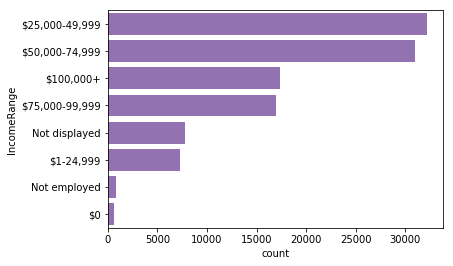

In [9]:
binsize = 10
base = sb.color_palette()[4]

#plt.figure(figsize=[8, 5])
sb.countplot(data = df, y = 'IncomeRange', color = base, order = df['IncomeRange'].value_counts().index)
#plt.xticks(rotation= 90)

This plot shows that the highest loans are taken out by people in the middle income distribution. Except a few outliers that have 0 income majority of the loans are to income group of 25k-75k and it dwindles at higher values which means that middle class earners need more loans.

(0, 2)

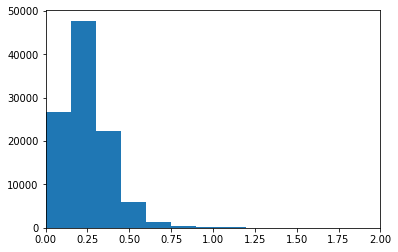

In [10]:
fig = plt.figure()


bin_s = np.arange(0,df.DebtToIncomeRatio.max()+0.15, 0.15)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bin_s)
plt.xlim(0,2)

#### > There are 200 odd values of debt to income ratio which are over 10 which were skewing the plot. It is clear that majority of the borrowers range from 0 to 0.4 debt to income ratio. There are very few count of loans given to clients with debt ratio higher than 2 but even if we consider the 100 additional borrowers between 2 and 3, the biggest anomaly is debt to ratio of 10.01 for 272 candidates. This seems like an anomaly that should be removed

In [11]:
#Exporting to csv to investigate and remove
dfd = df[df['DebtToIncomeRatio']>= 2]
dfd.to_csv('DebttoincomeOutliers.csv', index = False)

> 

(array([ 2169.,   930.,  2154.,  3728.,  6172.,  9510.,  9382.,  8731.,
        10227.,  7371.,  9440.,  5757.,  5940.,  5083.,  3722.,  4061.,
         3375.,  1987.,  1913.,  1223.,  2394.,   991.,   797.,   823.,
          489.,  1092.,   510.,   326.,   299.,   300.,   476.,   179.,
          133.,   422.,   161.]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000., 10500., 11000., 11500.,
        12000., 12500., 13000., 13500., 14000., 14500., 15000., 15500.,
        16000., 16500., 17000., 17500.]),
 <a list of 35 Patch objects>)

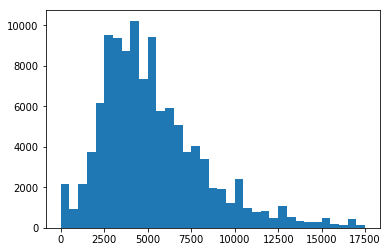

In [12]:
#Based on the above exploration it makes sense to analyze the monthly income stats
bin_size = np.arange(dfd.StatedMonthlyIncome.min(), dfd.StatedMonthlyIncome.max()+500, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bin_size)

Surprisingly most of the data with a monthly income of 0 seems to be accurate but it maybe safer to drop all data with  <1 StatedMonthly income and the income is unverified.
Binning  is a surprisingly effective method and really defines the visualization in a big, 500 seems to work great here but 200 produces thin spikes

In [91]:
df_mi = df[~((df['StatedMonthlyIncome']== 0) & (df['IncomeVerifiable']== False))]
df_mi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112607 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             112607 non-null object
ListingNumber                          112607 non-null int64
ListingCreationDate                    112607 non-null object
CreditGrade                            28306 non-null object
Term                                   112607 non-null int64
LoanStatus                             112607 non-null category
ClosedDate                             54046 non-null datetime64[ns]
BorrowerAPR                            112582 non-null float64
BorrowerRate                           112607 non-null float64
LenderYield                            112607 non-null float64
EstimatedEffectiveYield                84170 non-null float64
EstimatedLoss                          84170 non-null float64
EstimatedReturn                        84170 non-null float64
ProsperRating (numeric)                84170 non-null category
ProsperRati

In [92]:
# Removing all stated income below 1$ that is not verifiable
df = df[~((df['StatedMonthlyIncome']< 1) & (df['IncomeVerifiable']==False))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112375 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             112375 non-null object
ListingNumber                          112375 non-null int64
ListingCreationDate                    112375 non-null object
CreditGrade                            28079 non-null object
Term                                   112375 non-null int64
LoanStatus                             112375 non-null category
ClosedDate                             53816 non-null datetime64[ns]
BorrowerAPR                            112350 non-null float64
BorrowerRate                           112375 non-null float64
LenderYield                            112375 non-null float64
EstimatedEffectiveYield                84165 non-null float64
EstimatedLoss                          84165 non-null float64
EstimatedReturn                        84165 non-null float64
ProsperRating (numeric)                84165 non-null category
ProsperRati

([<matplotlib.axis.XTick at 0x19c6ac5fe48>,
 <a list of 7 Text xticklabel objects>)

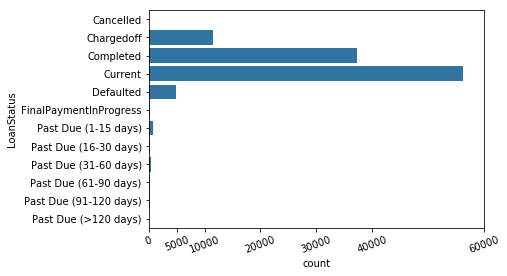

In [104]:
#bin_s = np.arange(df.LoanOriginalAmount.min(),df.LoanOriginalAmount.max()+1000, 1000)
#fig, ax = plt.subplots(nrows = 3, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'LoanStatus', color = default_color)
plt.xticks(x_ticks,rotation = 20)

> This is a great portfolio of loans as it seems that most of the loans are current and completed and the number of default loans is less than 5000 out of 110000

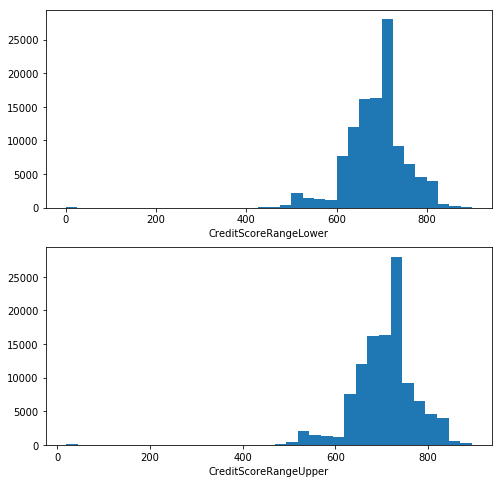

In [137]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

variables = ['CreditScoreRangeLower','CreditScoreRangeUpper']
for i in range(len(variables)):
    var = variables[i]
    bin_s = np.arange(min(df[var]), max(df[var])+25, 25)
    ax[i].hist(data = df, x =var, bins = bin_s)
    ax[i].set_xlabel('{}'.format(var))

The creditscore plot shows that majority of the loan applicants are between 600 to 8000 credit score range. This lies in the good to excellent category of credit risk which means that the loans are given out after performing these checks.

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 2.5000e+01, 1.5780e+03, 8.7750e+03, 1.4554e+04,
        1.7288e+04, 1.6122e+04, 1.4160e+04, 9.9460e+03, 1.1314e+04,
        7.4090e+03]),
 array([-0.1827, -0.1527, -0.1227, -0.0927, -0.0627, -0.0327, -0.0027,
         0.0273,  0.0573,  0.0873,  0.1173,  0.1473,  0.1773,  0.2073,
         0.2373,  0.2673,  0.2973]),
 <a list of 16 Patch objects>)

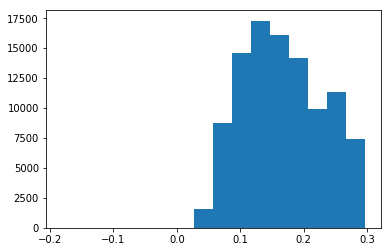

In [157]:
bin_s = np.arange(df.EstimatedReturn.min(),df.EstimatedReturn.max()+0.03, 0.03)
plt.hist(data =df, x='LenderYield', bins = bin_s)

> It can be seen from the plot of the estimated return that the margin on the loans ranges between 0.1 to 0.3 for the lender

(array([6.2550e+03, 1.1132e+04, 1.0089e+04, 1.6514e+04, 8.4530e+03,
        4.9930e+03, 6.4020e+03, 3.8790e+03, 2.8920e+03, 1.1659e+04,
        1.5160e+03, 2.5350e+03, 1.9360e+03, 9.5300e+02, 1.2512e+04,
        4.5300e+02, 6.3900e+02, 6.4300e+02, 4.3200e+02, 3.3340e+03,
        1.9400e+02, 2.8400e+02, 1.8100e+02, 2.4200e+02, 3.5760e+03,
        1.4000e+01, 2.2000e+01, 2.6000e+01, 2.0000e+00, 1.1100e+02,
        2.4000e+01, 2.7000e+01, 1.1000e+01, 4.4000e+02]),
 array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
        19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000,
        28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000],
       dtype=int64),
 <a list of 34 Patch objects>)

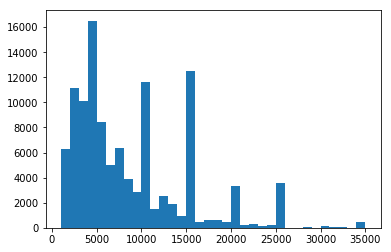

In [162]:
bin_s = np.arange(df.LoanOriginalAmount.min(),df.LoanOriginalAmount.max()+1000,1000)
plt.hist(data =df, x='LoanOriginalAmount', bins = bin_s)

> The plot for the original loan shows in terms of count the lower amount loans outnumber the loans at ahigher amounts. Also some of the spikes observed for round figures are quite expected as people tend to borrow in round figure amounts.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The overall distributions of the variables used to provide loans are as expected. The only anomalies found were in the debt to income ratio where some of the outlier were over 10 which were quite, the action taken was to delete the records that did not have a verifiable montly income as debt to income ratio is calculated based on the monthly income.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are a total of 81 features to be investigated, I have picked the ones that may be used to decide the outcome of the loan and may help decide if the loan maybe defaulted on. No feature seems to be useless outright, initially the GradeScore variable seemed low in number but a quick viewing showed that it is useful for variables where the prosper rating is not available. Some of the features dealing with credit score and the borrower history were not set as categorical data and changes had to be made to produce accurate plots. A lot of ordinal variables were set including credit score which helped in assessing the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [13]:
numeric_vars = ['LoanOriginalAmount','LoanCurrentDaysDelinquent',\
                'EstimatedReturn','LP_NetPrincipalLoss','BorrowerAPR', 'AvailableBankcardCredit']
categorical_vars = ['ProsperScore', 'ProsperRating (numeric)']

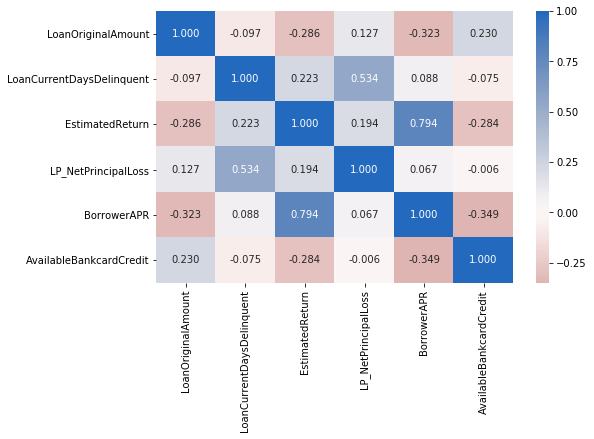

In [14]:
samples = np.random.choice(df.shape[0],2000,replace = False)
df_sample = df.loc[samples,:]
plt.figure(figsize=[8,5])
sb.heatmap(df[numeric_vars].corr(),annot=True, fmt = '.3f',
           cmap= 'vlag_r', center = 0)
plt.show()

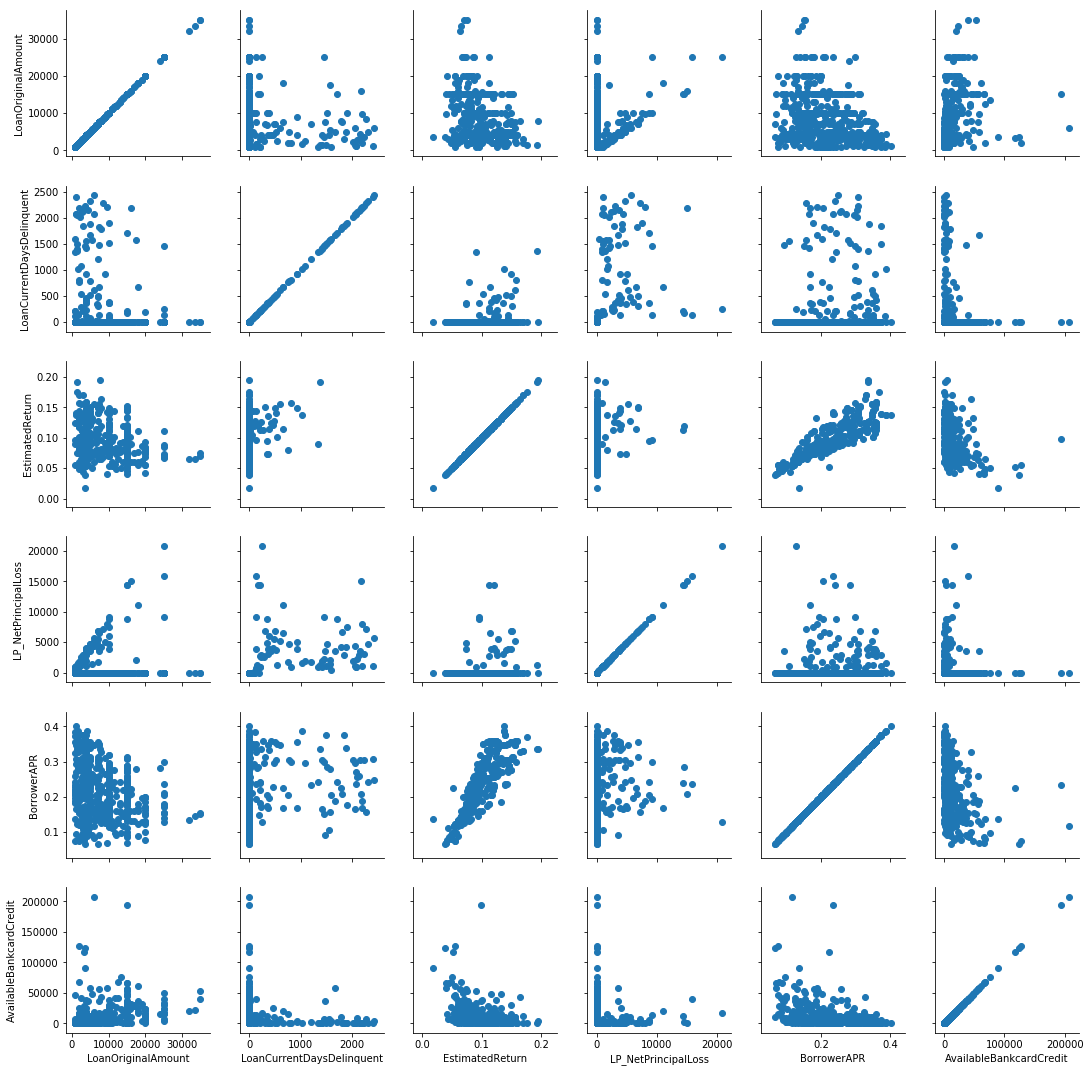

In [31]:
samples = np.random.choice(df.shape[0],500,replace = False)
df_sample = df.loc[samples,:]
base_color = sb.color_palette()[0]

g = sb.PairGrid(data = df_sample, vars = numeric_vars)
g = g.map(plt.scatter)

C:\Users\nandayu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

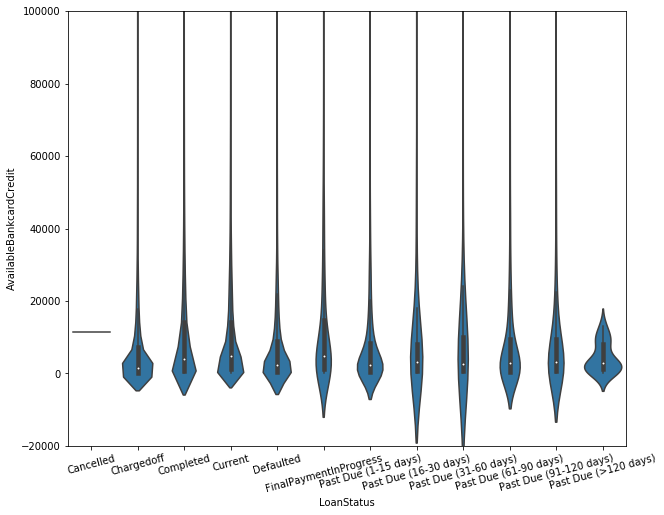

In [32]:
#'IncomeRange','LoanStatus',
samples = np.random.choice(df.shape[0],2000,replace = False)
df_sample = df.loc[samples,:]
base_color = sb.color_palette()[0]
plt.figure(figsize =[10,8])
sb.violinplot(data= df, x='LoanStatus', y= 'AvailableBankcardCredit', color= base_color)
plt.ylim(-20000,100000)
plt.xticks(rotation = 15)

<Figure size 720x864 with 0 Axes>

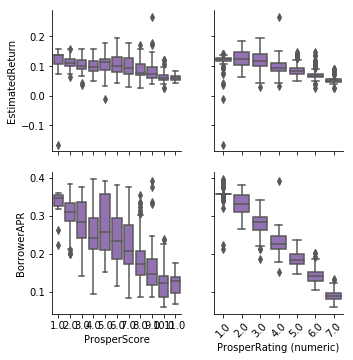

In [33]:
#Simulating plots of categorical vs numeric fields

sample = np.random.choice(df.shape[0],2000, replace = False)
df_samp = df.loc[sample,:]

def boxgrid(x,y,**kwargs):
    base = sb.color_palette()[4]
    sb.boxplot(x,y, color =base)
plt.figure(figsize = [10,12])
g= sb.PairGrid(data= df_samp, y_vars =['EstimatedReturn','BorrowerAPR']\
               ,x_vars = categorical_vars)
g.map(boxgrid)
plt.xticks(rotation = 45)
plt.show()

C:\Users\nandayu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nandayu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nandayu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tupl

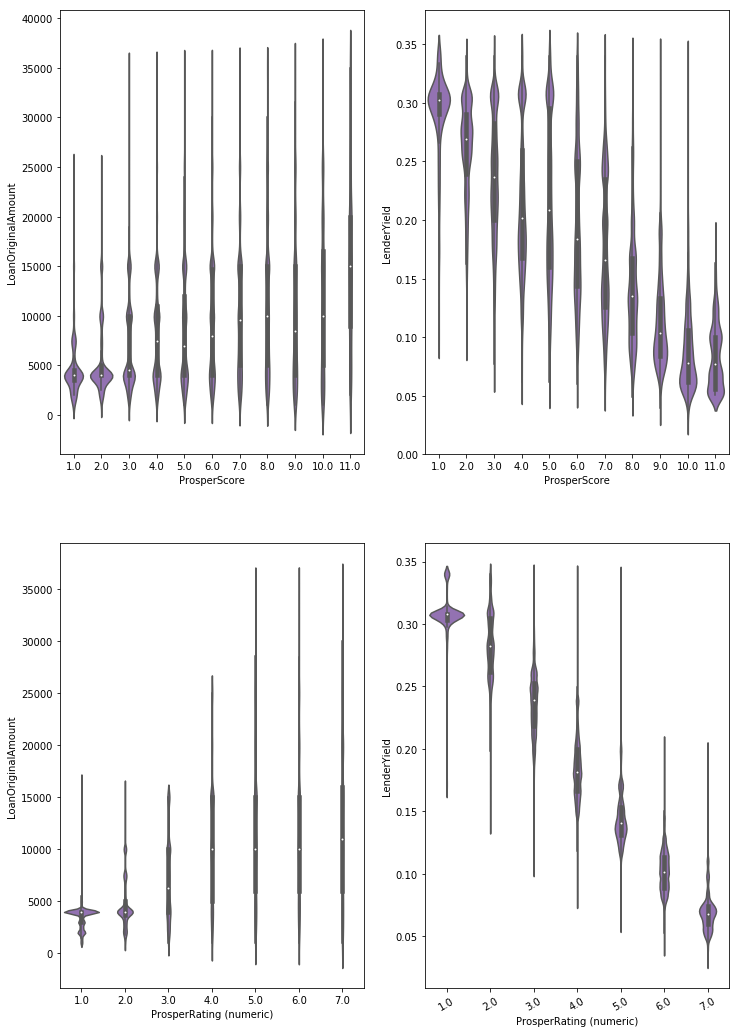

In [304]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=[12,18])
plt.xticks(rotation= 30)
num = ['LoanOriginalAmount','LenderYield','LoanCurrentDaysDelinquent']

for i in range(len(categorical_vars)):
    var = categorical_vars[i]
    sb.violinplot(data = df, x =var, y ='LoanOriginalAmount', color = base, ax= ax[i,0])
    plt.xticks(rotation= 30) 
    sb.violinplot(data =df,x =var, y ='LenderYield', color = base, ax= ax[i,1] )
    plt.xticks(rotation= 30)    
plt.show()

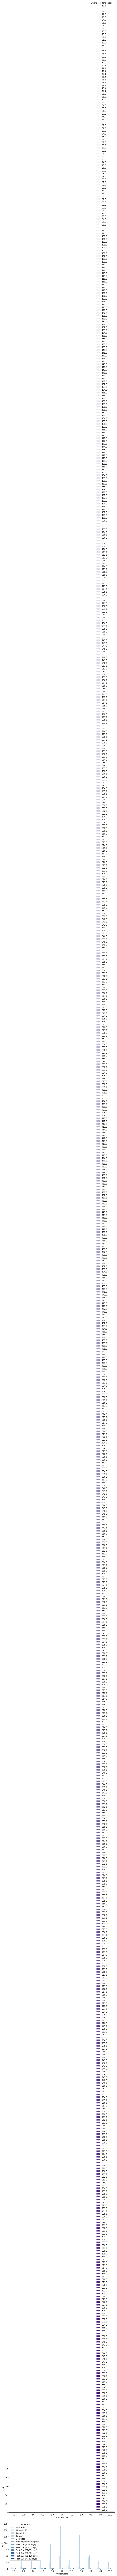

In [35]:
#Plotting Categorical Variables against Categorical Variables
plt.figure(figsize = [10,10])

plt.subplot(2,1,1)
sb.countplot(data = df_samp, x= 'ProsperScore', hue= 'CreditScoreRangeUpper', palette= 'Purples')

plt.subplot(2,1,2)
sb.countplot(data= df_samp, x= 'ProsperScore',hue ='LoanStatus',palette= 'Blues')

#plt.subplot(3,1,3)
#sb.countplot(data=df_samp, x ='LoanStatus', hue = 'CreditScoreRangeUpper',palette = 'Greens')

In [52]:
df_counts = df.groupby(['ProsperScore','LoanStatus']).size()
df_counts = df_counts.reset_index(name = 'count')
df_counts = df_counts.pivot(index='LoanStatus', columns ='ProsperScore',values = 'count')
df_counts.fillna(0,inplace = True)
df_counts

ProsperScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
LoanStatus,,,,,,,,,,,
Chargedoff,235.0,377.0,414.0,784.0,907.0,925.0,662.0,666.0,309.0,57.0,0.0
Completed,341.0,848.0,1077.0,1828.0,2212.0,2847.0,2357.0,3711.0,2836.0,1576.0,31.0
Current,337.0,4196.0,5804.0,9476.0,6222.0,7981.0,7210.0,7265.0,3612.0,3054.0,1419.0
Defaulted,37.0,70.0,75.0,119.0,165.0,173.0,135.0,139.0,71.0,20.0,1.0
FinalPaymentInProgress,2.0,23.0,20.0,28.0,25.0,25.0,16.0,39.0,13.0,11.0,3.0
Past Due (1-15 days),13.0,90.0,105.0,151.0,117.0,124.0,80.0,86.0,26.0,13.0,1.0
Past Due (16-30 days),8.0,35.0,26.0,56.0,29.0,38.0,32.0,31.0,8.0,2.0,0.0
Past Due (31-60 days),5.0,47.0,43.0,55.0,51.0,65.0,41.0,38.0,9.0,9.0,0.0
Past Due (61-90 days),4.0,41.0,45.0,52.0,42.0,43.0,37.0,35.0,10.0,3.0,1.0


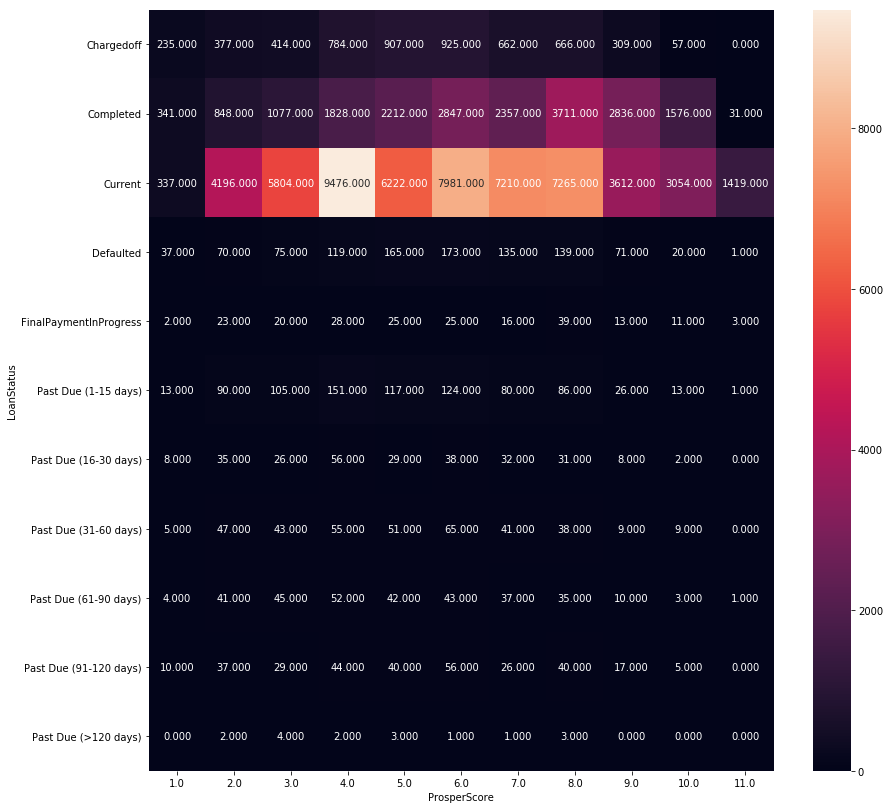

In [48]:
plt.figure(figsize= [14,14])
sb.heatmap(df_counts, annot= True, fmt= '.3f')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!